In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

### Goal: Use logistic regression to predict whether a student will be admitted based on their SAT score.

Accuracy of the logistic regression model: 0.91


/Users/taha/data-science/python-fundamentals/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


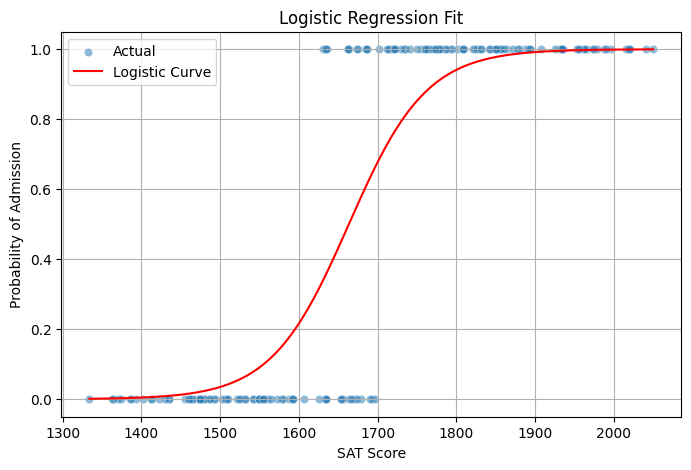

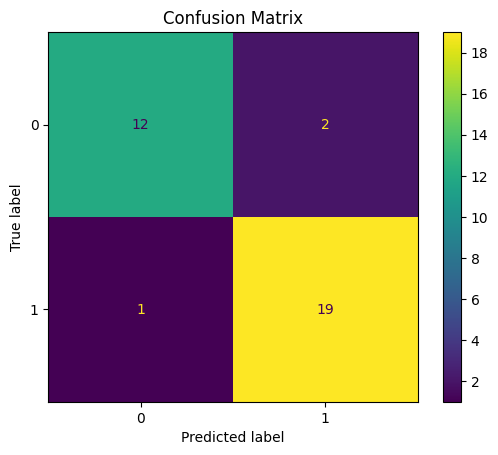

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.90      0.95      0.93        20

    accuracy                           0.91        34
   macro avg       0.91      0.90      0.91        34
weighted avg       0.91      0.91      0.91        34



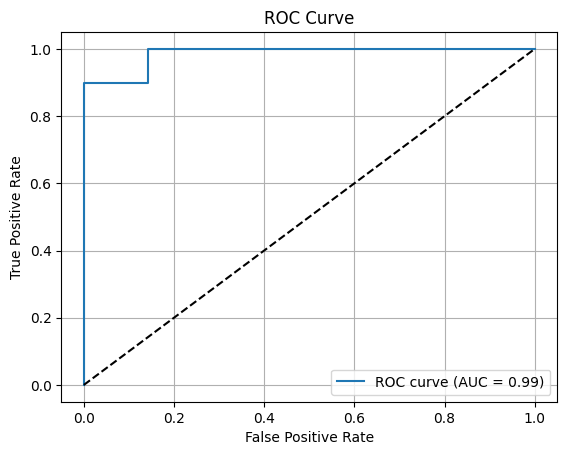

In [10]:
# Set random seed for reproducible results - same random numbers every time
np.random.seed(42)

# Load the dataset
df = pd.read_csv('../datasets/admittance.csv')

# Use logistic regression to predict 'Yes' or 'No' based on SAT score

# Convert 'Admit' column to binary values: 'Yes' -> 1, 'No' -> 0
df['Admit'] = df['Admitted'].map({'Yes': 1, 'No': 0})

# Define features and target variable
X = df[['SAT']]
y = df['Admit']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy of the logistic regression model: {accuracy:.2f}')
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual_Admit': y_test.values.flatten(),
    'Predicted_Admit': y_pred.flatten()
})

# Plot the logistic regression curve
plt.figure(figsize=(8, 5))
# Scatter actual data
sns.scatterplot(x=X['SAT'], y=df['Admit'], label='Actual', alpha=0.5)
# Generate SAT values for smooth curve
sat_range = np.linspace(X['SAT'].min(), X['SAT'].max(), 300).reshape(-1, 1)
sat_range_scaled = scaler.transform(sat_range)
probs = model.predict_proba(sat_range_scaled)[:, 1]
plt.plot(sat_range, probs, color='red', label='Logistic Curve')
plt.xlabel('SAT Score')
plt.ylabel('Probability of Admission')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.show()



cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# ROC Curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


### Goal: Use logistic regression to predict whether a user will purchase based on age and estimated salary.

Predicted Purchase for sample (Age: 30, Estimated Salary: 87000): 0
Accuracy of the logistic regression model: 0.86
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



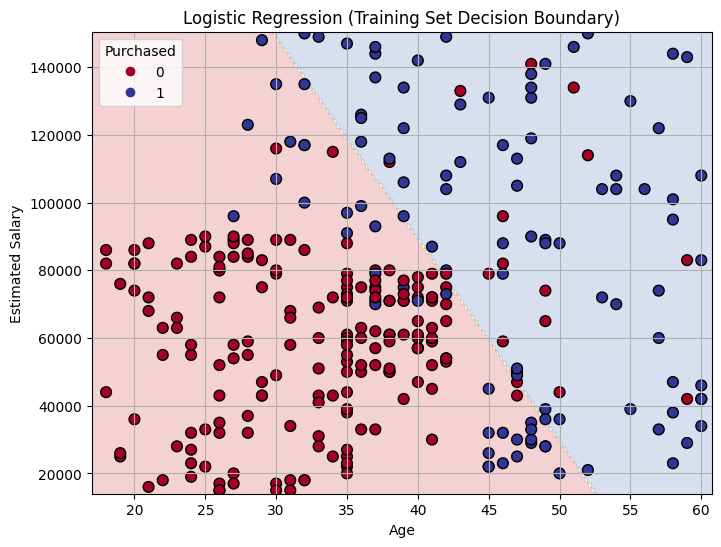

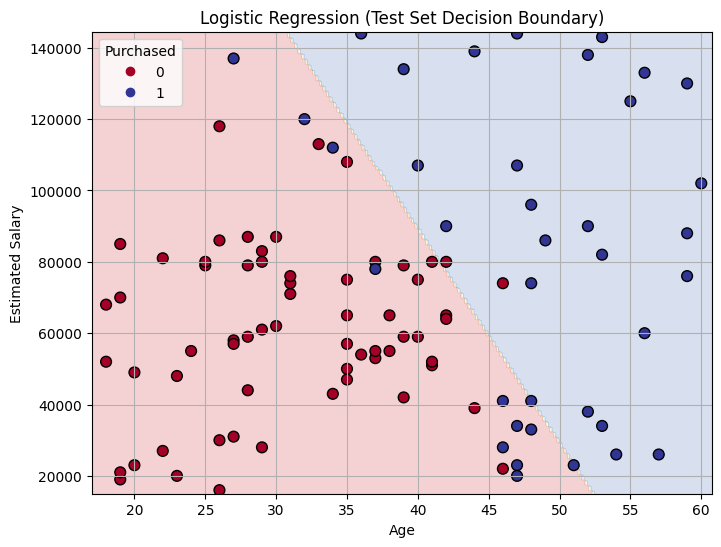

In [11]:
# Load dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# Use logistic regression to predict whether a user will purchase based on age and estimated salary

X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)  

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Do this:
sample = pd.DataFrame([[30, 87000]], columns=['Age', 'EstimatedSalary'])
sample_scaled = scaler.transform(sample)
print(f'Predicted Purchase for sample (Age: 30, Estimated Salary: 87000): {model.predict(sample_scaled)[0]}')

# Calculate the accuracy of the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy of the logistic regression model: {accuracy:.2f}')

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual_Purchase': y_test.values.flatten(),
    'Predicted_Purchase': y_pred.flatten()
})

# print all evaluation metrics
print(classification_report(y_test, y_pred))

# visualize the training set results with decision boundary
def plot_decision_boundary(X, y, model, scaler, title):
    x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
    y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 1000
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.25),
        np.arange(y_min, y_max, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid, columns=['Age', 'EstimatedSalary'])
    grid_scaled = scaler.transform(grid_df)
    probs = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, alpha=0.2, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X['Age'], X['EstimatedSalary'], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=60)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Purchased")
    plt.grid(True)
    plt.show()

# Plot for training set
plot_decision_boundary(X_train, y_train, model, scaler, "Logistic Regression (Training Set Decision Boundary)")

# Plot for test set
plot_decision_boundary(X_test, y_test, model, scaler, "Logistic Regression (Test Set Decision Boundary)")